In [2]:
### import librairies ###
print(f"Importing librairies ... ", end='')
import sys
sys.path.append(r"C:\Users\valentin\Documents\HMM")
import numpy as np
from myHmmPackage.cluster_decoder import ClusterDecoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
print('done')

Importing librairies ... done


In [3]:
### data ###
n_samples = 100 #n_trials
n_time_points = 102
n_regions = 2 #IC ou region ou electrod ou channels
n_label_features = 48 
n_clusters = 4 # n_clusters

In [33]:
X = np.random.uniform(low=-10, high=10, size=(n_samples, n_time_points, n_regions))
W = np.random.randint(low=-10, high=10,size=(n_clusters, n_regions, n_label_features))
W_temp = np.reshape(W, newshape=(n_regions, n_clusters, n_label_features))

transition = np.random.randint(n_time_points,size=(n_clusters))
transition = np.concatenate(([0],np.sort(transition),[n_time_points]))

#gamma = np.random.randint(2, size=(n_time_points,n_clusters))
gamma = np.array([[1 if (transition[(j)] <= i) and (i < transition[(j+1)]) else 0 for i in range(n_time_points)  ] 
                for j in range(n_clusters)],dtype=int)
gamma = np.transpose(gamma,(1,0))

y = X @ np.sum(gamma @ W_temp, axis=1)
y = np.reshape(y, newshape=(n_samples, n_time_points, n_label_features))

In [48]:
def a(t,r):
    idx = np.count_nonzero(transition < t)
    print(transition,t,idx)
    return a_list[idx,r]
a_list = np.random.uniform(low=0,high=2*np.pi/n_time_points, size=(n_clusters,n_regions))

def omega(t,r):
    idx = np.count_nonzero(transition < t)
    return omega_list[idx,r]
omega_list = np.random.uniform(low=0,high=2*np.pi/n_time_points, size=(n_clusters,n_regions))

sigma = np.random.uniform(low=0,high=0.1,size=n_samples)

In [49]:
def f(s,t,r):
    #return a(t,r)*np.cos(omega(t,r)*t) + sigma[s]*np.random.normal(loc=0, scale=sigma[s])
    return a(t,r)
    
X = np.random.uniform(low=-10, high=10, size=(n_samples, n_time_points, n_regions))
X = np.array([ f(s,t,r) for s in range(n_samples)
                    for t in range(n_time_points)
                    for r in range(n_regions)],
             dtype=float)

[  0   8  61  79  95 102] 0 0
[  0   8  61  79  95 102] 0 0
[  0   8  61  79  95 102] 1 1
[  0   8  61  79  95 102] 1 1
[  0   8  61  79  95 102] 2 1
[  0   8  61  79  95 102] 2 1
[  0   8  61  79  95 102] 3 1
[  0   8  61  79  95 102] 3 1
[  0   8  61  79  95 102] 4 1
[  0   8  61  79  95 102] 4 1
[  0   8  61  79  95 102] 5 1
[  0   8  61  79  95 102] 5 1
[  0   8  61  79  95 102] 6 1
[  0   8  61  79  95 102] 6 1
[  0   8  61  79  95 102] 7 1
[  0   8  61  79  95 102] 7 1
[  0   8  61  79  95 102] 8 1
[  0   8  61  79  95 102] 8 1
[  0   8  61  79  95 102] 9 2
[  0   8  61  79  95 102] 9 2
[  0   8  61  79  95 102] 10 2
[  0   8  61  79  95 102] 10 2
[  0   8  61  79  95 102] 11 2
[  0   8  61  79  95 102] 11 2
[  0   8  61  79  95 102] 12 2
[  0   8  61  79  95 102] 12 2
[  0   8  61  79  95 102] 13 2
[  0   8  61  79  95 102] 13 2
[  0   8  61  79  95 102] 14 2
[  0   8  61  79  95 102] 14 2
[  0   8  61  79  95 102] 15 2
[  0   8  61  79  95 102] 15 2
[  0   8  61  79  95 102] 16

IndexError: index 4 is out of bounds for axis 0 with size 4

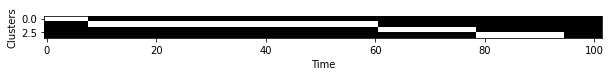

In [50]:
plt.figure(figsize=(10,5))
plt.imshow(gamma.T,cmap='gray')
plt.xlabel("Time")
plt.ylabel("Clusters")
plt.show()

In [6]:
print(f"Starting cluster decoder ... ")
clf = ClusterDecoder(n_clusters=n_clusters, method='sequential', max_iter=1e3)
clf.fit(X,y) # renvoie gamma et W
print('done\n')


Starting cluster decoder ... 


100%|██████████| 999/999 [00:12<00:00, 81.70it/s]

done



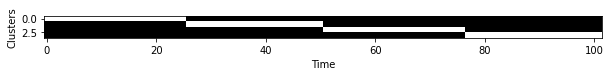

In [7]:
plt.figure(figsize=(10,5))
plt.imshow(clf.gamma_.T,cmap='gray')
plt.xlabel("Time")
plt.ylabel("Clusters")
plt.show()

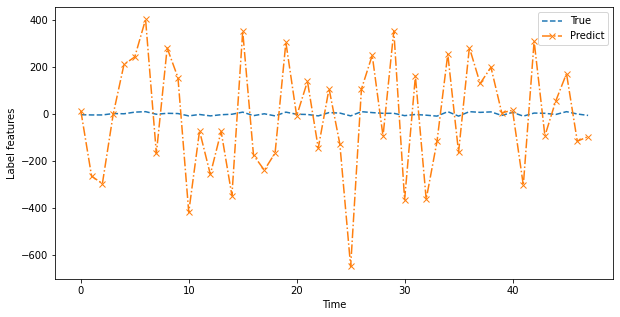

In [8]:
plt.figure(figsize=(10,5))
k = np.random.randint(n_regions)
plt.plot(W[0,k,:].T, '--', label="True")
plt.plot(clf.decoding_mats_[0,k,:].T, '-.x', label="Predict")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Label features")
plt.show()

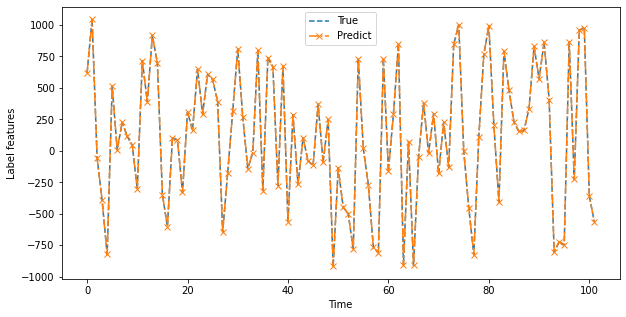

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y[0,:,0].T, '--', label="True")
plt.plot(clf.predict(X)[0,:,0].T, '-.x', label="Predict")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Label features")
plt.show()

In [56]:

y_true = y.flatten()
y_predict = clf.predict(X).flatten()
print(f"r2_score : {r2_score(y_true, y_predict)}")
print(f"mean_squared_error : {mean_squared_error(y_true, y_predict)}")    
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_true, y_predict)}")

r2_score : 0.9999999833629296
mean_squared_error : 0.08335741293974705
mean_absolute_percentage_error : 0.0011371964895615806
